<a href="https://colab.research.google.com/github/knysmchr/Code-storage/blob/main/Pokemon_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#目的

使用率が高いポケモンからどのような傾向があるか知りたい。(元データにはメガシンカ後のデータも含まれているが、メガシンカについては今回考慮していない。)

#仮説

「とくこう」「すばやさ」が高いポケモンが使用率が高いのではないか。

#データの前処理

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Pokemon.csv')

In [3]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
data = data.rename(columns = {'#':'PBN','Type 1':'Type_1','Type 2':'Type_2','Sp. Atk':'Sp_Atk','Sp. Def':'Sp_Def'})

各技への耐性についての特徴量を作成。

In [5]:
for col in data['Type_1'].unique():
  data[f'vs_{col}']=1

In [6]:
idx_Type_1_Normal=data[data['Type_1']=='Normal'].index
idx_Type_1_Fire=data[data['Type_1']=='Fire'].index
idx_Type_1_Water=data[data['Type_1']=='Water'].index
idx_Type_1_Electric=data[data['Type_1']=='Electric'].index
idx_Type_1_Grass=data[data['Type_1']=='Grass'].index
idx_Type_1_Ice=data[data['Type_1']=='Ice'].index
idx_Type_1_Fighting=data[data['Type_1']=='Fighting'].index
idx_Type_1_Poison=data[data['Type_1']=='Poison'].index
idx_Type_1_Ground=data[data['Type_1']=='Ground'].index
idx_Type_1_Flying=data[data['Type_1']=='Flying'].index
idx_Type_1_Psychic=data[data['Type_1']=='Psychic'].index
idx_Type_1_Bug=data[data['Type_1']=='Bug'].index
idx_Type_1_Rock=data[data['Type_1']=='Rock'].index
idx_Type_1_Ghost=data[data['Type_1']=='Ghost'].index
idx_Type_1_Dragon=data[data['Type_1']=='Dragon'].index
idx_Type_1_Dark=data[data['Type_1']=='Dark'].index
idx_Type_1_Steel=data[data['Type_1']=='Steel'].index
idx_Type_1_Fairy=data[data['Type_1']=='Fairy'].index
idx_Type_2_Normal=data[data['Type_2']=='Normal'].index
idx_Type_2_Fire=data[data['Type_2']=='Fire'].index
idx_Type_2_Water=data[data['Type_2']=='Water'].index
idx_Type_2_Electric=data[data['Type_2']=='Electric'].index
idx_Type_2_Grass=data[data['Type_2']=='Grass'].index
idx_Type_2_Ice=data[data['Type_2']=='Ice'].index
idx_Type_2_Fighting=data[data['Type_2']=='Fighting'].index
idx_Type_2_Poison=data[data['Type_2']=='Poison'].index
idx_Type_2_Ground=data[data['Type_2']=='Ground'].index
idx_Type_2_Flying=data[data['Type_2']=='Flying'].index
idx_Type_2_Psychic=data[data['Type_2']=='Psychic'].index
idx_Type_2_Bug=data[data['Type_2']=='Bug'].index
idx_Type_2_Rock=data[data['Type_2']=='Rock'].index
idx_Type_2_Ghost=data[data['Type_2']=='Ghost'].index
idx_Type_2_Dragon=data[data['Type_2']=='Dragon'].index
idx_Type_2_Dark=data[data['Type_2']=='Dark'].index
idx_Type_2_Steel=data[data['Type_2']=='Steel'].index
idx_Type_2_Fairy=data[data['Type_2']=='Fairy'].index

In [7]:
data.loc[idx_Type_1_Normal,['vs_Fighting']]*=2
data.loc[idx_Type_1_Normal,['vs_Ghost']]*=0
data.loc[idx_Type_1_Fire,['vs_Fire','vs_Grass','vs_Ice','vs_Bug','vs_Steel','vs_Fairy']]*=0.5
data.loc[idx_Type_1_Fire,['vs_Water','vs_Ground','vs_Rock']]*=2
data.loc[idx_Type_1_Water,['vs_Fire','vs_Water','vs_Ice','vs_Steel']]*=0.5
data.loc[idx_Type_1_Water,['vs_Electric','vs_Grass']]*=2
data.loc[idx_Type_1_Electric,['vs_Electric','vs_Flying','vs_Steel']]*=0.5
data.loc[idx_Type_1_Electric,['vs_Ground']]*=2
data.loc[idx_Type_1_Grass,['vs_Water','vs_Electric','vs_Grass','vs_Ground']]*=0.5
data.loc[idx_Type_1_Grass,['vs_Fire','vs_Ice','vs_Poison','vs_Flying','vs_Bug']]*=2
data.loc[idx_Type_1_Ice,['vs_Ice']]*=0.5
data.loc[idx_Type_1_Ice,['vs_Fire','vs_Fighting','vs_Rock','vs_Steel']]*=2
data.loc[idx_Type_1_Fighting,['vs_Bug','vs_Rock','vs_Dark']]*=0.5
data.loc[idx_Type_1_Fighting,['vs_Flying','vs_Psychic','vs_Fairy']]*=2
data.loc[idx_Type_1_Poison,['vs_Grass','vs_Fighting','vs_Poison','vs_Bug','vs_Fairy']]*=0.5
data.loc[idx_Type_1_Poison,['vs_Ground','vs_Psychic']]*=2
data.loc[idx_Type_1_Ground,['vs_Electric']]*=0
data.loc[idx_Type_1_Ground,['vs_Poison','vs_Rock']]*=0.5
data.loc[idx_Type_1_Ground,['vs_Water','vs_Grass','vs_Ice']]*=2
data.loc[idx_Type_1_Flying,['vs_Ground']]*=0
data.loc[idx_Type_1_Flying,['vs_Grass','vs_Fighting','vs_Bug']]*=0.5
data.loc[idx_Type_1_Flying,['vs_Electric','vs_Ice','vs_Rock']]*=2
data.loc[idx_Type_1_Psychic,['vs_Fighting','vs_Psychic']]*=0.5
data.loc[idx_Type_1_Psychic,['vs_Bug','vs_Ghost','vs_Dark']]*=2
data.loc[idx_Type_1_Bug,['vs_Grass','vs_Fighting','vs_Ground']]*=0.5
data.loc[idx_Type_1_Bug,['vs_Fire','vs_Flying','vs_Rock']]*=2
data.loc[idx_Type_1_Rock,['vs_Normal','vs_Fire','vs_Poison','vs_Flying']]*=0.5
data.loc[idx_Type_1_Rock,['vs_Water','vs_Grass','vs_Fighting','vs_Ground','vs_Steel']]*=2
data.loc[idx_Type_1_Ghost,['vs_Normal','vs_Fighting']]*=0
data.loc[idx_Type_1_Ghost,['vs_Poison','vs_Bug']]*=0.5
data.loc[idx_Type_1_Ghost,['vs_Ghost','vs_Dark']]*=2
data.loc[idx_Type_1_Dragon,['vs_Fire','vs_Water','vs_Electric','vs_Grass']]*=0.5
data.loc[idx_Type_1_Dragon,['vs_Ice','vs_Dragon','vs_Fairy']]*=2
data.loc[idx_Type_1_Dark,['vs_Psychic']]*=0
data.loc[idx_Type_1_Dark,['vs_Ghost','vs_Dark']]*=0.5
data.loc[idx_Type_1_Dark,['vs_Fighting','vs_Bug','vs_Fairy']]*=2
data.loc[idx_Type_1_Steel,['vs_Poison']]*=0
data.loc[idx_Type_1_Steel,['vs_Normal','vs_Grass','vs_Ice','vs_Flying','vs_Psychic','vs_Bug','vs_Rock','vs_Dragon','vs_Steel','vs_Fairy']]*=0.5
data.loc[idx_Type_1_Steel,['vs_Fire','vs_Fighting','vs_Ground']]*=2
data.loc[idx_Type_1_Fairy,['vs_Dragon']]*=0
data.loc[idx_Type_1_Fairy,['vs_Fighting','vs_Bug','vs_Dark']]*=0.5
data.loc[idx_Type_1_Fairy,['vs_Poison','vs_Steel']]*=2
data.loc[idx_Type_2_Normal,['vs_Fighting']]*=2
data.loc[idx_Type_2_Normal,['vs_Ghost']]*=0
data.loc[idx_Type_2_Fire,['vs_Fire','vs_Grass','vs_Ice','vs_Bug','vs_Steel','vs_Fairy']]*=0.5
data.loc[idx_Type_2_Fire,['vs_Water','vs_Ground','vs_Rock']]*=2
data.loc[idx_Type_2_Water,['vs_Fire','vs_Water','vs_Ice','vs_Steel']]*=0.5
data.loc[idx_Type_2_Water,['vs_Electric','vs_Grass']]*=2
data.loc[idx_Type_2_Electric,['vs_Electric','vs_Flying','vs_Steel']]*=0.5
data.loc[idx_Type_2_Electric,['vs_Ground']]*=2
data.loc[idx_Type_2_Grass,['vs_Water','vs_Electric','vs_Grass','vs_Ground']]*=0.5
data.loc[idx_Type_2_Grass,['vs_Fire','vs_Ice','vs_Poison','vs_Flying','vs_Bug']]*=2
data.loc[idx_Type_2_Ice,['vs_Ice']]*=0.5
data.loc[idx_Type_2_Ice,['vs_Fire','vs_Fighting','vs_Rock','vs_Steel']]*=2
data.loc[idx_Type_2_Fighting,['vs_Bug','vs_Rock','vs_Dark']]*=0.5
data.loc[idx_Type_2_Fighting,['vs_Flying','vs_Psychic','vs_Fairy']]*=2
data.loc[idx_Type_2_Poison,['vs_Grass','vs_Fighting','vs_Poison','vs_Bug','vs_Fairy']]*=0.5
data.loc[idx_Type_2_Poison,['vs_Ground','vs_Psychic']]*=2
data.loc[idx_Type_2_Ground,['vs_Electric']]*=0
data.loc[idx_Type_2_Ground,['vs_Poison','vs_Rock']]*=0.5
data.loc[idx_Type_2_Ground,['vs_Water','vs_Grass','vs_Ice']]*=2
data.loc[idx_Type_2_Flying,['vs_Ground']]*=0
data.loc[idx_Type_2_Flying,['vs_Grass','vs_Fighting','vs_Bug']]*=0.5
data.loc[idx_Type_2_Flying,['vs_Electric','vs_Ice','vs_Rock']]*=2
data.loc[idx_Type_2_Psychic,['vs_Fighting','vs_Psychic']]*=0.5
data.loc[idx_Type_2_Psychic,['vs_Bug','vs_Ghost','vs_Dark']]*=2
data.loc[idx_Type_2_Bug,['vs_Grass','vs_Fighting','vs_Ground']]*=0.5
data.loc[idx_Type_2_Bug,['vs_Fire','vs_Flying','vs_Rock']]*=2
data.loc[idx_Type_2_Rock,['vs_Normal','vs_Fire','vs_Poison','vs_Flying']]*=0.5
data.loc[idx_Type_2_Rock,['vs_Water','vs_Grass','vs_Fighting','vs_Ground','vs_Steel']]*=2
data.loc[idx_Type_2_Ghost,['vs_Normal','vs_Fighting']]*=0
data.loc[idx_Type_2_Ghost,['vs_Poison','vs_Bug']]*=0.5
data.loc[idx_Type_2_Ghost,['vs_Ghost','vs_Dark']]*=2
data.loc[idx_Type_2_Dragon,['vs_Fire','vs_Water','vs_Electric','vs_Grass']]*=0.5
data.loc[idx_Type_2_Dragon,['vs_Ice','vs_Dragon','vs_Fairy']]*=2
data.loc[idx_Type_2_Dark,['vs_Psychic']]*=0
data.loc[idx_Type_2_Dark,['vs_Ghost','vs_Dark']]*=0.5
data.loc[idx_Type_2_Dark,['vs_Fighting','vs_Bug','vs_Fairy']]*=2
data.loc[idx_Type_2_Steel,['vs_Poison']]*=0
data.loc[idx_Type_2_Steel,['vs_Normal','vs_Grass','vs_Ice','vs_Flying','vs_Psychic','vs_Bug','vs_Rock','vs_Dragon','vs_Steel','vs_Fairy']]*=0.5
data.loc[idx_Type_2_Steel,['vs_Fire','vs_Fighting','vs_Ground']]*=2
data.loc[idx_Type_2_Fairy,['vs_Dragon']]*=0
data.loc[idx_Type_2_Fairy,['vs_Fighting','vs_Bug','vs_Dark']]*=0.5
data.loc[idx_Type_2_Fairy,['vs_Poison','vs_Steel']]*=2


In [8]:
data.to_csv('/content/drive/MyDrive/pokemon_new.csv',index=None)

使用率を知るためにポケモンデータベースから情報を得る。また、上記のデータベースがポケモン名英語のため橋渡しとなる情報も得る。

In [9]:
import urllib.request as request
import requests
from bs4 import BeautifulSoup

In [10]:
# 使用率の高い順に並んだポケモンのDataFrameを作成
# URL定義
url = 'https://swsh.pokedb.tokyo/pokemon/list?season=18&rule=0'

# HTML取得
response = request.urlopen(url)
bs = BeautifulSoup(response, 'html.parser')

# 順位で並んだポケモンの要素を取り出す
pokemon = bs.select('.pokemon-ranking-name')

# リストを定義
pokemon_list = []

# ポケモンの要素をリストに挿入
for i,p in enumerate(pokemon):
  pokemon_list.append(pokemon[i].text.replace('\n                                ','').replace('                            ',''))
# 重複があったため重複解消
pokemon_list = sorted(set(pokemon_list), key = pokemon_list.index)

# DataFrameに変換
pokemon_dict = {'Name_ja':pokemon_list,'Freq_of_use':[i+1 for i in range(len(pokemon_list))]}
order = pd.DataFrame(pokemon_dict)

In [11]:
order.to_csv('/content/drive/MyDrive/pokemon_order.csv',index=None)

In [12]:
# 日英変換のためのDataFrameを作成
# URL定義
pokemon_url = "https://wiki.ポケモン.com/wiki/ポケモンの外国語名一覧"

# HTML取得
r = requests.get(pokemon_url)
soup = BeautifulSoup(r.content, "html.parser")

# リストを定義　*ここに各行のデータを加えていく
rows = []

# 各行を処理する
for tr in soup.find("div", {"id": "mw-content-text"}).findAll("tr"):
    # thタグがあればTableのコラムとしてデータを取得
    if tr.find("th"):
        columns = [x.getText().strip() for x in tr.findAll("th")]

    # tdタグがあればリストに挿入
    if tr.find("td"):
        rows.append([x.getText().strip() for x in tr.findAll("td")])

# DataFrameに変換する
df = pd.DataFrame(rows, columns=columns,index=[x+1 for x in range(len(rows))])
# df = pd.DataFrame(rows, columns=columns)

# 不要な列を削除
df_new = df.drop(columns = ['番号', 'ドイツ語', 'フランス語', '韓国語', '中国語（簡）', '中国語（繁）'])

# columns名を変更
df_new = df_new.rename(columns = {'日本語':'Name_ja', '英語':'Name'})

In [13]:
df_new.to_csv('/content/drive/MyDrive/pokemon_enja.csv',index=None)

DataFrame結合

  ポケモンが覚える技をDataframeに入れるため、「ポケモン徹底攻略(https://yakkun.com/swsh/zukan/#sort=no)」　からデータを取得。別途でcsvを作成しcsvを読み込む。

In [14]:
skill=pd.read_csv('/content/drive/MyDrive/pokemon_skill.csv')
skill=skill.drop(columns='Unnamed: 0')

上記同様にして、ポケモンのとくせいをDataFrameに入れるため、データを取得。

In [15]:
feature=pd.read_csv('/content/drive/MyDrive/Pokemon_feature.csv')

In [16]:
data.columns

Index(['PBN', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary', 'vs_Grass',
       'vs_Fire', 'vs_Water', 'vs_Bug', 'vs_Normal', 'vs_Poison',
       'vs_Electric', 'vs_Ground', 'vs_Fairy', 'vs_Fighting', 'vs_Psychic',
       'vs_Rock', 'vs_Ghost', 'vs_Ice', 'vs_Dragon', 'vs_Dark', 'vs_Steel',
       'vs_Flying'],
      dtype='object')

In [17]:
data2 = data.merge(df_new, on = 'Name')
data2 = data2.merge(order, on = 'Name_ja')
data2 = data2.reindex(columns=['PBN', 'Name', 'Name_ja',
       'Freq_of_use', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'vs_Grass',
       'vs_Fire', 'vs_Water', 'vs_Bug', 'vs_Normal', 'vs_Poison',
       'vs_Electric', 'vs_Ground', 'vs_Fairy', 'vs_Fighting', 'vs_Psychic',
       'vs_Rock', 'vs_Ghost', 'vs_Ice', 'vs_Dragon', 'vs_Dark', 'vs_Steel',
       'vs_Flying', 'Generation', 'Legendary'])
data2_d=data2.sort_values('Freq_of_use').reset_index(drop=True).drop(columns=['Freq_of_use','Generation','Legendary'])
data2_d=data2_d.merge(skill,on='Name_ja')
data2_d=data2_d.merge(feature,on='Name_ja')

In [18]:
for col in data2_d.columns[12:]:
  data2_d[col]=data2_d[col].astype(object)

使用頻度の降順とする(使用率の高い順に並んだポケモンのDataFrame内の英語名と日英変換用のDataFrameの英語名が異なるところがあるため番号は歯抜けになってしまったが今回は無視。一度、降順とし、Freq_of_useを削除。再度Freq_of_useを割振) 

In [19]:
data3 = pd.concat([data2_d,pd.DataFrame({'Freq_Of_Use':[i+1 for i in range(len(data2_d))]})],axis=1)
data3[data3['Freq_Of_Use']<=30]

,PBN,Name,Name_ja,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,vs_Grass,vs_Fire,vs_Water,vs_Bug,vs_Normal,vs_Poison,vs_Electric,vs_Ground,vs_Fairy,vs_Fighting,vs_Psychic,vs_Rock,vs_Ghost,vs_Ice,vs_Dragon,vs_Dark,vs_Steel,vs_Flying,アームハンマー,アイアンテール,アイアンヘッド,アイアンローラー,あおいほのお,アクアジェット,アクアテール,アクアブレイク,アクアリング,あくうせつだん,...,まけんき,マジシャン,マジックガード,マジックミラー,マルチスケイル,ミイラ,みずがため,ミストメイカー,みずのベール,みつあつめ,ミラーアーマー,ミラクルスキン,むしのしらせ,ムラっけ,メガランチャー,メタルプロテクト,メロメロボディ,めんえき,もうか,ものひろい,もふもふ,もらいび,やるき,ゆうばく,ゆきかき,ゆきがくれ,ゆきふらし,ようりょくそ,よちむ,よびみず,よわき,ライトメタル,リーフガード,リベロ,りゅうのあぎと,りんぷん,レシーバー,わたげ,わるいてぐせ,Freq_Of_Use
0,145,Zapdos,サンダー,Electric,Flying,580,90,90,85,125,90,100,0.5,1,1,0.5,1,1,1,0,1,0.5,1,2,1,2,1,1,0.5,0.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,149,Dragonite,カイリュー,Dragon,Flying,600,91,134,95,100,100,80,0.25,0.5,0.5,0.5,1,1,1,0,2,0.5,1,2,1,4,2,1,1,1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,445,Garchomp,ガブリアス,Dragon,Ground,600,108,130,95,80,85,102,1,0.5,1,1,1,0.5,0,1,2,1,1,0.5,1,4,2,1,1,1,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,450,Hippowdon,カバルドン,Ground,NaN,525,108,112,118,68,72,47,2,1,2,1,1,0.5,0,1,1,1,1,0.5,1,2,1,1,1,1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,598,Ferrothorn,ナットレイ,Grass,Steel,489,74,94,131,54,116,20,0.25,4,0.5,1,0.5,0,0.5,1,0.5,2,0.5,0.5,1,1,0.5,1,0.5,1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
5,248,Tyranitar,バンギラス,Rock,Dark,600,100,134,110,95,100,61,2,0.5,2,2,0.5,0.5,1,2,2,4,0,1,0.5,1,1,0.5,2,0.5,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
6,260,Swampert,ラグラージ,Water,Ground,535,100,110,90,85,90,60,4,0.5,1,1,1,0.5,0,1,1,1,1,0.5,1,1,1,1,0.5,1,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
7,464,Rhyperior,ドサイドン,Ground,Rock,535,115,140,130,55,55,40,4,0.5,4,1,0.5,0.25,0,2,1,2,1,0.5,1,2,1,1,2,0.5,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
8,530,Excadrill,ドリュウズ,Ground,Steel,508,110,135,60,50,65,88,1,2,2,0.5,0.5,0,0,2,0.5,2,0.5,0.25,1,1,0.5,1,0.5,0.5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
9,131,Lapras,ラプラス,Water,Ice,535,130,85,80,85,95,60,2,1,0.5,1,1,1,2,1,1,2,1,2,1,0.25,1,1,1,1,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


列名

'PBN':ポケモン図鑑番号

'Name':ポケモン名(英語)

'Name_ja':ポケモン名(日本語)

'Freq_of_use':使用頻度ランク

'Type 1':タイプ1

'Type 2':タイプ2

'Total':ステータス総合値

'HP':ヒットポイント

'Attack':こうげき

'Defense':ぼうぎょ

'Sp. Atk':とくこう

'Sp. Def':とくぼう

'Speed':すばやさ

'vs_○○':○○タイプの技への耐性

#データの可視化

In [20]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 0 to 444
Columns: 911 entries, PBN to Freq_Of_Use
dtypes: int64(9), object(902)
memory usage: 3.1+ MB


In [21]:
data3.describe()

,PBN,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Freq_Of_Use
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,359.121348,420.541573,69.053933,74.757303,73.085393,68.498876,70.714607,64.431461,223.000000
std,215.623752,101.811282,27.571639,29.081579,30.959242,27.354745,27.271192,27.399249,128.604691
min,1.000000,190.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,149.000000,328.000000,50.000000,53.000000,50.000000,50.000000,50.000000,45.000000,112.000000
50%,359.000000,442.000000,65.000000,75.000000,70.000000,65.000000,66.000000,60.000000,223.000000
75%,560.000000,500.000000,80.000000,95.000000,90.000000,90.000000,85.000000,84.000000,334.000000
max,715.000000,670.000000,255.000000,160.000000,230.000000,145.000000,230.000000,160.000000,445.000000


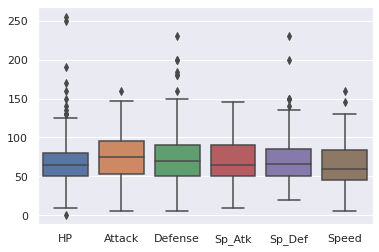

In [22]:
sns.boxplot(data = data3[['HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed']])

Freq_Of_Useが30以下の時、使用率が高いと定義

In [23]:
data3['High_Rate'] = 0
for i in range(len(data3)):
  if data3['Freq_Of_Use'][i] <= 30:
    data3['High_Rate'][i] = 1
data3.head(40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PBN,Name,Name_ja,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,vs_Grass,vs_Fire,vs_Water,vs_Bug,vs_Normal,vs_Poison,vs_Electric,vs_Ground,vs_Fairy,vs_Fighting,vs_Psychic,vs_Rock,vs_Ghost,vs_Ice,vs_Dragon,vs_Dark,vs_Steel,vs_Flying,アームハンマー,アイアンテール,アイアンヘッド,アイアンローラー,あおいほのお,アクアジェット,アクアテール,アクアブレイク,アクアリング,あくうせつだん,...,マジシャン,マジックガード,マジックミラー,マルチスケイル,ミイラ,みずがため,ミストメイカー,みずのベール,みつあつめ,ミラーアーマー,ミラクルスキン,むしのしらせ,ムラっけ,メガランチャー,メタルプロテクト,メロメロボディ,めんえき,もうか,ものひろい,もふもふ,もらいび,やるき,ゆうばく,ゆきかき,ゆきがくれ,ゆきふらし,ようりょくそ,よちむ,よびみず,よわき,ライトメタル,リーフガード,リベロ,りゅうのあぎと,りんぷん,レシーバー,わたげ,わるいてぐせ,Freq_Of_Use,High_Rate
0,145,Zapdos,サンダー,Electric,Flying,580,90,90,85,125,90,100,0.5,1,1,0.5,1,1,1,0,1,0.5,1,2,1,2,1,1,0.5,0.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,149,Dragonite,カイリュー,Dragon,Flying,600,91,134,95,100,100,80,0.25,0.5,0.5,0.5,1,1,1,0,2,0.5,1,2,1,4,2,1,1,1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
2,445,Garchomp,ガブリアス,Dragon,Ground,600,108,130,95,80,85,102,1,0.5,1,1,1,0.5,0,1,2,1,1,0.5,1,4,2,1,1,1,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
3,450,Hippowdon,カバルドン,Ground,NaN,525,108,112,118,68,72,47,2,1,2,1,1,0.5,0,1,1,1,1,0.5,1,2,1,1,1,1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
4,598,Ferrothorn,ナットレイ,Grass,Steel,489,74,94,131,54,116,20,0.25,4,0.5,1,0.5,0,0.5,1,0.5,2,0.5,0.5,1,1,0.5,1,0.5,1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
5,248,Tyranitar,バンギラス,Rock,Dark,600,100,134,110,95,100,61,2,0.5,2,2,0.5,0.5,1,2,2,4,0,1,0.5,1,1,0.5,2,0.5,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1
6,260,Swampert,ラグラージ,Water,Ground,535,100,110,90,85,90,60,4,0.5,1,1,1,0.5,0,1,1,1,1,0.5,1,1,1,1,0.5,1,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1
7,464,Rhyperior,ドサイドン,Ground,Rock,535,115,140,130,55,55,40,4,0.5,4,1,0.5,0.25,0,2,1,2,1,0.5,1,2,1,1,2,0.5,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1
8,530,Excadrill,ドリュウズ,Ground,Steel,508,110,135,60,50,65,88,1,2,2,0.5,0.5,0,0,2,0.5,2,0.5,0.25,1,1,0.5,1,0.5,0.5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1
9,131,Lapras,ラプラス,Water,Ice,535,130,85,80,85,95,60,2,1,0.5,1,1,1,2,1,1,2,1,2,1,0.25,1,1,1,1,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1


In [24]:
data3[data3['High_Rate'] == 1].describe()

,PBN,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Freq_Of_Use,High_Rate
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,311.033333,536.133333,96.100000,95.366667,91.900000,88.966667,88.700000,75.100000,15.500000,1.0
std,197.895215,50.313317,34.677181,33.717368,30.263612,25.501161,20.020937,21.857454,8.803408,0.0
min,6.000000,420.000000,50.000000,5.000000,5.000000,35.000000,45.000000,20.000000,1.000000,1.0
25%,134.500000,512.250000,80.000000,70.000000,78.250000,71.250000,77.750000,60.000000,8.250000,1.0
50%,316.500000,535.000000,93.000000,94.500000,85.000000,90.000000,90.000000,80.000000,15.500000,1.0
75%,471.750000,580.000000,106.000000,128.750000,109.000000,109.750000,100.000000,90.750000,22.750000,1.0
max,700.000000,600.000000,250.000000,140.000000,180.000000,130.000000,130.000000,116.000000,30.000000,1.0


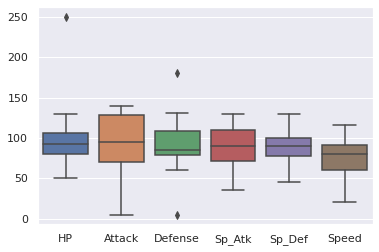

In [25]:
sns.boxplot(data=data3[data3['High_Rate'] == 1][['HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed']])

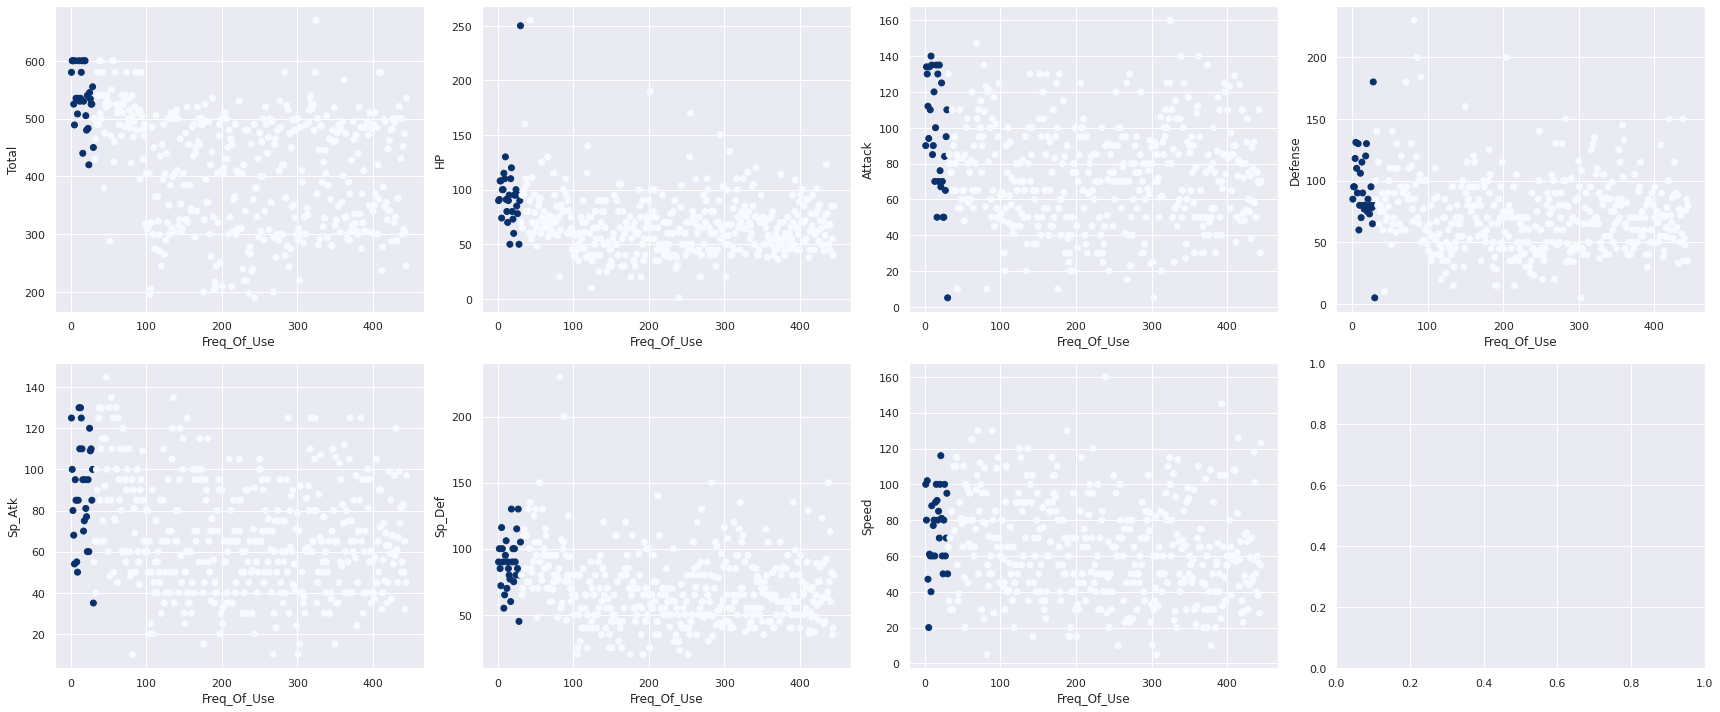

In [27]:
rows=2
cols=4
fig,axes=plt.subplots(rows,cols,figsize=(cols*6,rows*5))
li=['Total','HP', 'Attack', 'Defense','Sp_Atk', 'Sp_Def', 'Speed']
for r in range(0,rows):
  for c in range(0,cols):
    i=r*cols+c
    if i < len(li):
      axes[r][c].scatter(x='Freq_Of_Use',y=li[i],data=data3,c='High_Rate',cmap='Blues')
      axes[r][c].set_ylabel(li[i])
      axes[r][c].set_xlabel('Freq_Of_Use')
plt.tight_layout()
plt.show()

#分析

帰無仮説:使用率は「とくこう」、「すばやさ」に影響されない。

対立仮説:使用率は「とくこう」、「すばやさ」に影響される。

In [ ]:
# bins_total_edges=[-float('inf'),328,442,500,float('inf')]
# bins_hp_edges=[-float('inf'),50,65,80,float('inf')]
# bins_attack_edges=[-float('inf'),53,75,95,float('inf')]
# bins_defense_edges=[-float('inf'),50,70,90,float('inf')]
# bins_sp_atk_edges=[-float('inf'),50,65,90,float('inf')]
# bins_sp_def_edges=[-float('inf'),50,66,85,float('inf')]
# bins_speed_edges=[-float('inf'),45,60,84,float('inf')]
# binned_total=pd.cut(data3['Total'],bins_total_edges,labels=False).astype(object)
# binned_hp=pd.cut(data3['HP'],bins_hp_edges,labels=False).astype(object)
# binned_attack=pd.cut(data3['Attack'],bins_attack_edges,labels=False).astype(object)
# binned_defense=pd.cut(data3['Defense'],bins_defense_edges,labels=False).astype(object)
# binned_sp_atk=pd.cut(data3['Sp_Atk'],bins_sp_atk_edges,labels=False).astype(object)
# binned_sp_def=pd.cut(data3['Sp_Def'],bins_sp_def_edges,labels=False).astype(object)
# binned_speed=pd.cut(data3['Speed'],bins_speed_edges,labels=False).astype(object)
# data3_2=pd.concat([data3,pd.DataFrame({'binned_total':binned_total,'binned_hp':binned_hp,'binned_attack':binned_attack,'binned_defense':binned_defense,'binned_sp_atk':binned_sp_atk,'binned_sp_def':binned_sp_def,'binned_speed':binned_speed})],axis=1)

In [ ]:
data3.to_csv('/content/drive/MyDrive/pokemon_fou.csv',index=None)

「Freq_Of_Use」を目的変数とした分散分析を行う。(今回は覚える技、とくせいは省略)

In [ ]:
model=smf.ols('Freq_Of_Use ~ Total + HP + Attack + Defense + Sp_Atk + Sp_Def + Speed + Type_1 + Type_2 + vs_Grass + vs_Fire + vs_Water + vs_Bug + vs_Normal + vs_Poison + vs_Electric + vs_Ground + vs_Fairy + vs_Fighting + vs_Psychic + vs_Rock + vs_Ghost + vs_Ice + vs_Dragon + vs_Dark + vs_Steel + vs_Flying' ,data = data3).fit()
# model=smf.ols('Freq_Of_Use ~ binned_total + binned_hp + binned_attack + binned_defense + binned_sp_atk + binned_sp_def +  binned_speed + Type_1 + Type_2', data = data3).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Type_1,4.175742e+05,17.0,1.919821,2.080992e-02
Type_2,2.739979e+05,17.0,1.259721,2.277337e-01
vs_Grass,6.652013e+04,4.0,1.299778,2.731617e-01
vs_Fire,5.250153e+04,4.0,1.025860,3.962225e-01
vs_Water,6.360025e+04,4.0,1.242724,2.957115e-01
vs_Bug,3.670677e+04,4.0,0.717236,5.815103e-01
vs_Normal,3.270431e+04,3.0,0.852040,4.677539e-01
vs_Poison,5.425533e+04,5.0,0.848103,5.179312e-01
vs_Electric,8.730669e+04,4.0,1.705939,1.520824e-01
vs_Ground,9.082623e+04,4.0,1.774709,1.373254e-01


#結果

「すばやさ」のp値は0.05より大きく、「とくこう」のp値は0.05より小さいため、使用率は「すばやさ」からの影響は受けると判断はできないが「とくこう」からの影響を受ける、という結論に至った。
単体の数値の高低の影響というより、総合値の高低やとくせい、覚える技に大きく影響されていると考えられる。そのため、次回解析する場合は総合値、とくせい、覚える技に焦点を当てた分析が必要。